In [2]:
%run team3_module.py

In [17]:
import pandas as pd
import numpy as np

# 현재 작업 디렉토리 확인
script_dir = os.getcwd()  # 현재 작업 디렉토리
file_path = os.path.join(script_dir,'..','Youri','류현진출전일점유율.csv')
file_path = os.path.abspath(file_path)

# CSV 파일을 읽기

data = pd.read_csv(file_path)

# data.info()
data.head()

,날짜,요일,홈,방문,구장_x,관중수,좌석수,점유율,상대,구분,...,TBF,IP,H,HR,BB,HBP,SO,R,ER,ERA2
0,2024/03/23,토,LG,한화,잠실,23750.0,23750,1.000000,LG,선발,...,21.0,3 2/3,6.0,0.0,3.0,0.0,0.0,5.0,2.0,4.91
1,2024/03/24,일,LG,한화,잠실,23750.0,23750,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024/03/26,화,SSG,한화,문학,10541.0,23000,0.458304,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024/03/27,수,SSG,한화,문학,11005.0,23000,0.478478,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024/03/28,목,SSG,한화,문학,11755.0,23000,0.511087,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
import pandas as pd
import numpy as np

# 현재 작업 디렉토리 확인
script_dir = os.getcwd()  # 현재 작업 디렉토리
file_path = os.path.join(script_dir,'..','Youri','daily_crowd_data_2324.csv')
file_path = os.path.abspath(file_path)

# CSV 파일을 읽기

data = pd.read_csv(file_path)

# data.info()
data.head()

,날짜,요일,홈,방문,구장,관중수
0,2023/04/01,토,키움,한화,고척,"16,000"
1,2023/04/01,토,SSG,KIA,문학,"23,000"
2,2023/04/01,토,KT,LG,수원,"18,700"
3,2023/04/01,토,두산,롯데,잠실,"23,750"
4,2023/04/01,토,삼성,NC,대구,"24,000"


In [62]:
filtered_data = data[
    (data['날짜'] >= '2023/04/01') & 
    (data['날짜'] <= '2023/09/06') & 
    ((data['홈'] == '한화') | (data['방문'] == '한화'))
]

filtered_data

,날짜,요일,홈,방문,구장,관중수
0,2023/04/01,토,키움,한화,고척,"16,000"
5,2023/04/02,일,키움,한화,고척,"11,562"
10,2023/04/04,화,삼성,한화,대구,"5,936"
16,2023/04/06,목,삼성,한화,대구,"6,525"
21,2023/04/07,금,한화,SSG,대전,"10,415"
...,...,...,...,...,...,...
550,2023/09/01,금,LG,한화,잠실,"20,381"
554,2023/09/02,토,LG,한화,잠실,"23,574"
558,2023/09/03,일,LG,한화,잠실,"22,858"
565,2023/09/05,화,한화,SSG,대전,"5,124"


In [ ]:
filtered_data

In [20]:
관중수_평균 = 선발_data['관중수'].mean()
관중수_평균

np.float64(15670.375)

In [36]:
비선발관중수_평균 = 비선발_data['관중수'].mean()
비선발관중수_평균

np.float64(13938.280898876405)

In [37]:
len(선발_data)

24

In [44]:
len(비선발_data)

89

In [39]:
선발_se = np.std(선발_data['점유율']) / np.sqrt(len(선발_data))
선발_se

np.float64(0.035544822765897356)

In [43]:
(관중수_평균 - 비선발관중수_평균) / np.sqrt(선발_se**2 + 비선발_se**2)

NameError: name '비선발_se' is not defined

In [46]:
from scipy import stats

stats.norm.cdf(43621.9)

np.float64(1.0)

In [92]:
t, pvalue = stats.ttest_ind(선발_data['점유율'], 비선발_data['점유율'])
t, pvalue

(np.float64(-0.7445564848270642), np.float64(0.4581133132258286))

In [50]:
import numpy as np
from scipy.stats import permutation_test

# 두 그룹의 데이터를 준비합니다.
group1 = 선발_data['점유율']
group2 = 비선발_data['점유율']

# 순열 검정을 수행합니다.
def difference_of_means(group1, group2):
    return np.mean(group1) - np.mean(group2)

# permutation_test 함수를 사용하여 순열 검정을 수행합니다.
result = permutation_test((group1, group2), difference_of_means,
                          n_resamples=50000, alternative='two-sided')

# 결과 출력
print("순열 검정 통계량:", result.statistic)
print("p-값:", result.pvalue)


순열 검정 통계량: -0.029116497338725122
p-값: 0.4519909601807964


In [97]:
import numpy as np

선발_se = np.std(선발_data['점유율']) / np.sqrt(len(선발_data))

비선발_se = np.std(비선발_data['점유율']) / np.sqrt(len(비선발_data))

print(f"'한화' 류현진 선발등판 경기의 점유율 표준편차: {선발_se}")
print(f"'한화' 그 외 경기의 점유율 표준편차: {비선발_se}")

# 독립 표본 t-검정 수행
t_stat, p_value = stats.ttest_ind(선발_data['점유율'], 비선발_data['점유율'], equal_var=False)

print(f"t-검정 통계량: {t_stat}")
print(f"p-값: {p_value}")

# 가설 검정 결과 해석
alpha = 0.05  # 유의 수준
if p_value < alpha:
    print("귀무가설을 기각합니다. 류현진 선발등판 경기와 아닌 경기의 점유율 표준편차 간의 평균에 유의미한 차이가 있습니다.")
else:
    print("귀무가설을 기각할 수 없습니다. 류현진 선발등판 경기와 아닌 경기의 점유율 표준편차 간의 평균에 유의미한 차이가 없습니다.")

'한화' 류현진 선발등판 경기의 점유율 표준편차: 0.035544822765897356
'한화' 그 외 경기의 점유율 표준편차: 0.017697820574532643
t-검정 통계량: -0.7200486887271211
p-값: 0.47629622789188575
귀무가설을 기각할 수 없습니다. 류현진 선발등판 경기와 아닌 경기의 점유율 표준편차 간의 평균에 유의미한 차이가 없습니다.


In [ ]:
home_column = '한화'
home_crowd = data[data['홈'] == home_column]['관중수']

# '한화' 팀의 방문 관중 데이터를 필터링
visit_column = '한화'
visit_crowd = data[data['방문'] == visit_column]['관중수']

# 홈과 방문 관중의 표준편차 계산
home_std_dev = home_crowd.std()
visit_std_dev = visit_crowd.std()

print(f"'한화' 팀 홈 관중의 표준편차: {home_std_dev}")
print(f"'한화' 팀 방문 관중의 표준편차: {visit_std_dev}")

# 독립 표본 t-검정 수행
t_stat, p_value = ttest_ind(home_crowd, visit_crowd, equal_var=False)

print(f"t-검정 통계량: {t_stat}")
print(f"p-값: {p_value}")

# 가설 검정 결과 해석
alpha = 0.05  # 유의 수준
if p_value < alpha:
    print("귀무가설을 기각합니다. '한화' 팀의 홈 관중과 방문 관중 간의 평균에 유의미한 차이가 있습니다.")
else:
    print("귀무가설을 기각할 수 없습니다. '한화' 팀의 홈 관중과 방문 관중 간의 평균에 유의미한 차이가 없습니다.")

In [45]:
data['점유율'].value_counts()

점유율
1.000000    61
0.458304     1
0.478478     1
0.511087     1
0.993600     1
0.932926     1
0.260354     1
0.554525     1
0.582193     1
0.670481     1
0.601444     1
0.907500     1
0.501230     1
0.561297     1
0.793500     1
0.777917     1
0.753667     1
0.834000     1
0.976130     1
0.930667     1
0.900583     1
0.950417     1
0.611016     1
0.782139     1
0.777895     1
0.910737     1
0.852758     1
0.930976     1
0.920000     1
0.963000     1
0.963667     1
0.927333     1
0.566167     1
0.750750     1
0.694167     1
0.936312     1
0.943500     1
0.950313     1
0.383992     1
0.422000     1
0.958417     1
0.990167     1
0.759893     1
0.801497     1
0.812674     1
0.678625     1
0.713083     1
0.765292     1
0.941833     1
0.979000     1
0.990333     1
0.915522     1
0.980217     1
Name: count, dtype: int64

C:\Users\medici\AppData\Local\Temp\ipykernel_10900\769250080.py:31: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\medici\AppData\Local\Temp\ipykernel_10900\769250080.py:31: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\medici\AppData\Local\Temp\ipykernel_10900\769250080.py:31: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\medici\AppData\Local\Temp\ipykernel_10900\769250080.py:31: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\medici\AppData\Local\Temp\ipykernel_10900\769250080.py:31: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\medici\AppData\Local\Temp\ipykernel_10900\769250080.py:31: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from

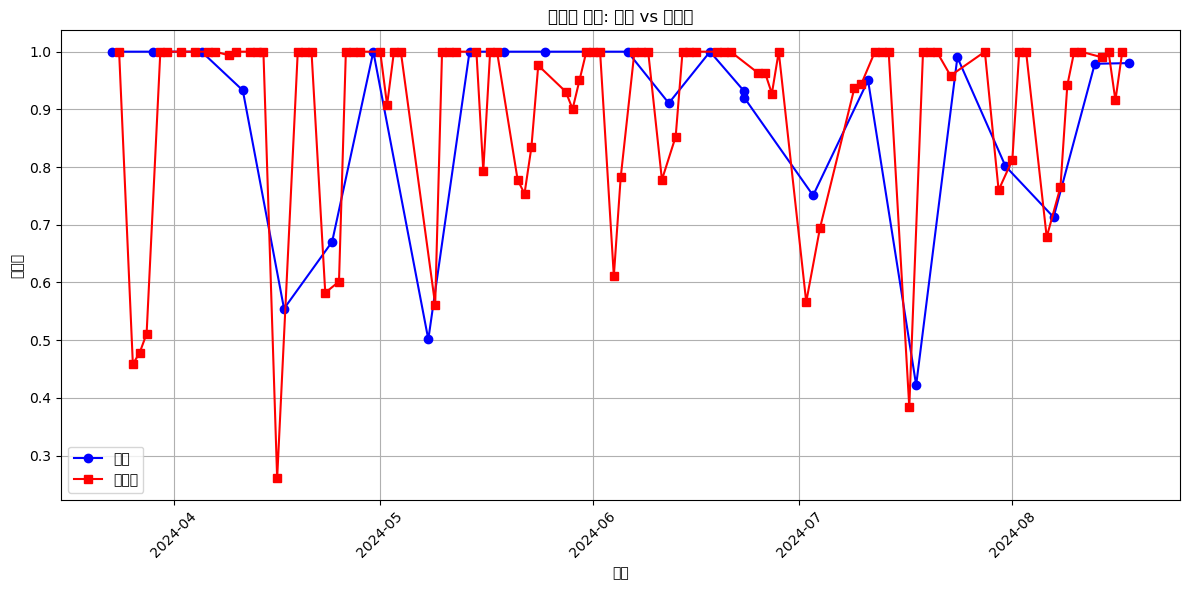

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# 날짜를 datetime 형식으로 변환
data['날짜'] = pd.to_datetime(data['날짜'])

# '구분'이 '선발'인 데이터와 아닌 데이터 분리
선발_data = data[data['구분'] == '선발']
비선발_data = data[data['구분'] != '선발']

# 그래프 그리기
plt.figure(figsize=(12, 6))

# '구분'이 '선발'인 날의 꺾은선 그래프
plt.plot(선발_data['날짜'], 선발_data['점유율'], 'o-', color='blue', label='선발')

# '구분'이 '선발'이 아닌 날의 꺾은선 그래프
plt.plot(비선발_data['날짜'], 비선발_data['점유율'], 's-', color='red', label='비선발')

# 그래프 제목 및 레이블 설정
plt.title('점유율 비교: 선발 vs 비선발')
plt.xlabel('날짜')
plt.ylabel('점유율')
plt.legend()

# x축 날짜 포맷팅 (예: YYYY-MM-DD 형식)
plt.xticks(rotation=45)
plt.grid(True)

# 그래프 보여주기
plt.tight_layout()
plt.show()


In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# 데이터프레임을 여기에 로드합니다.
# 예: data = pd.read_csv('your_file.csv')

# 날짜 열을 datetime 형식으로 변환합니다.
data['날짜'] = pd.to_datetime(data['날짜'])

# '구분'이 '선발'인 데이터와 '선발'이 아닌 데이터 분리
선발_data = data[data['구분'] == '선발']
비선발_data = data[data['구분'] != '선발']

# 월별 평균 계산
# '날짜'를 인덱스로 설정 후 월별로 그룹화하여 평균 계산
선발_data.set_index('날짜', inplace=True)
# 비선발_data.set_index('날짜', inplace=True)

avg_선발 = 관중수_평균['관중수'].resample('M').mean()
monthly_avg_비선발 = 비선발_data['점유율'].resample('M').mean()

# 막대 그래프 그리기
plt.figure(figsize=(8, 5))

# '구분'이 '선발'인 데이터의 막대 그래프
plt.bar(avg_선발.index, avg_선발, width=20, color='blue', label='선발', align='center')

# # '구분'이 '선발'이 아닌 데이터의 막대 그래프
# plt.bar(monthly_avg_비선발.index, monthly_avg_비선발, width=10, color='red', label='비선발', align='edge')

# 그래프 제목 및 레이블 설정
plt.title('월별 점유율 평균 비교 (막대그래프)')
plt.xlabel('날짜')
plt.ylabel('점유율')
plt.legend()

# x축 날짜 포맷팅
plt.xticks(rotation=45)
plt.grid(True, axis='y')

# 그래프 보여주기
plt.show()



KeyError: '날짜'

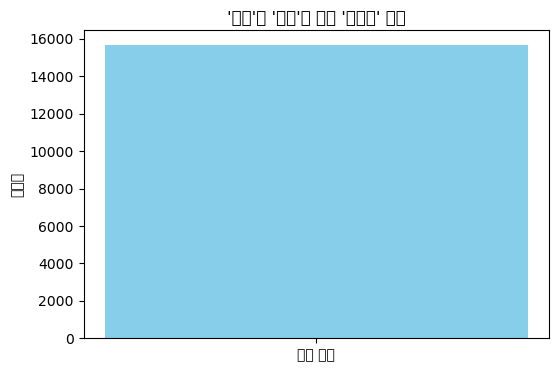

In [75]:

# 막대 그래프 그리기
plt.figure(figsize=(6, 4))

# 데이터 준비
labels = ['선발 경기']
values = [관중수_평균]

# 막대 그래프 그리기
plt.bar(labels, values, color='skyblue')

# 레이블 추가
plt.ylabel('관중수')
plt.title("'구분'이 '선발'인 날의 '관중수' 평균")

# 그래프 출력
plt.show()


In [61]:
비선발_dates = data[data['구분'] != '선발']['날짜']
비선발_dates

1     2024-03-24
2     2024-03-26
3     2024-03-27
4     2024-03-28
6     2024-03-30
         ...    
106   2024-08-11
108   2024-08-14
109   2024-08-15
110   2024-08-16
111   2024-08-17
Name: 날짜, Length: 89, dtype: datetime64[ns]

In [48]:
선발_dates = data[data['구분'] == '선발']['날짜']
선발_dates

0     2024-03-23
5     2024-03-29
10    2024-04-05
15    2024-04-11
20    2024-04-17
25    2024-04-24
30    2024-04-30
35    2024-05-08
40    2024-05-14
45    2024-05-19
50    2024-05-25
59    2024-06-06
64    2024-06-12
69    2024-06-18
73    2024-06-23
74    2024-06-23
80    2024-07-03
84    2024-07-11
89    2024-07-18
94    2024-07-24
97    2024-07-31
102   2024-08-07
107   2024-08-13
112   2024-08-18
Name: 날짜, dtype: datetime64[ns]

<function matplotlib.pyplot.show(close=None, block=None)>

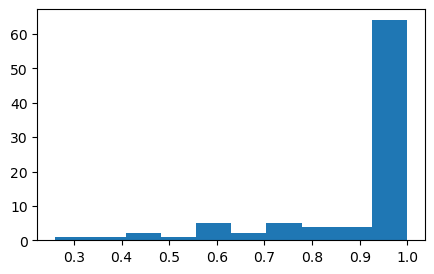

In [66]:
plt.figure(figsize=(5, 3))
plt.hist(비선발_data['점유율'], bins=10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

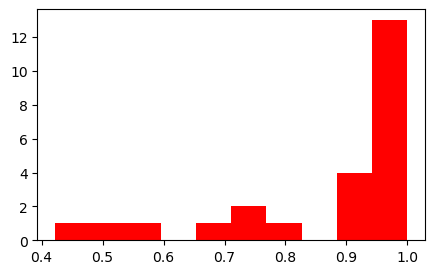

In [68]:
plt.figure(figsize=(5, 3))
plt.hist(선발_data['점유율'], bins=10, color = 'red')
plt.show